In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('../dataset/complete_dataset.csv')
dfs = df.sample(frac=1)
dfs.shape

C:\Users\janko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10927181, 19)

In [21]:
#df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
df.shape

(3729, 24)

# Clustering über Zeit mit Embeddings

In [4]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [5]:
filenames, embeddings = read_embeddings('../dataset/embeddings.txt')

In [6]:
filenames.shape, embeddings.shape

((3729,), (3729, 300))

In [7]:
df = df[df['filename'].isin(filenames)].copy()
df.shape

(3729, 19)

In [8]:
(df.filename == filenames).all()

True

In [9]:
#Einfügen der Embeddings ins Dataframe
df['embedding'] = [e for e in embeddings]
df.shape

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,embedding
706,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",movie,The Count of Monte Cristo - Part 2: Retribution,"Le comte de Monte Cristo, 2ème époque: Le chât...",0.0,1943.0,NaN,90,7.0,80.0,"[-0.09066946, 0.13505703, -0.19079152, -0.2511..."
2784,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75,nm0440757,"nm0440757,nm0833141,nm1127102",movie,Hände hoch oder ich schieße,Hände hoch oder ich schieße,0.0,1966.0,NaN,75,5.8,36.0,"[-0.08849932, 0.13341562, -0.16020295, -0.2384..."
3085,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78,nm0816215,nm0816215,movie,La lune avec les dents,La lune avec les dents,0.0,1967.0,NaN,78,7.0,34.0,"[-0.07498731, 0.13234918, -0.14840715, -0.2293..."
6044,5594522.xml,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82,nm1172472,NaN,movie,Brawl Busters,Sa-dae-tong-iue-moon,0.0,1978.0,NaN,82,6.2,31.0,"[-0.08724029, 0.1408841, -0.19008194, -0.26056..."
6281,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96,nm0814232,"nm0032816,nm0793999,nm0814232",movie,Sûpâ gun redei Wani Bunsho,Sûpâ gun redei Wani Bunsho,0.0,1979.0,NaN,96,5.7,44.0,"[-0.07911543, 0.15853323, -0.1507321, -0.24809..."


## Plot über Zeit

Mean:  2012.2115848753017 Median:  2012.0


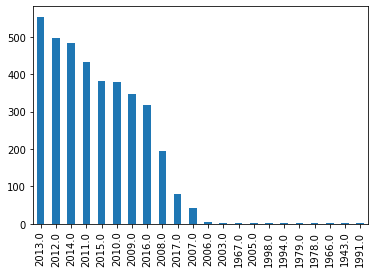

In [10]:
pd.value_counts(df['year']).plot.bar()
print('Mean: ', df['year'].mean(), 'Median: ', df['year'].median())

## Split der Daten in Zeitperioden

In [14]:
sincevalue = 2017
beforevalue = 2000
since = df.year >= sincevalue
before = df.year <= beforevalue
years = since + before
years.shape
colorlist = []

for x in df.year:
    if x >=2017:
        colorlist.append('red')
    elif x <= 2007:
        colorlist.append('blue')
    else: 
        colorlist.append('white')

C:\Users\janko\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [15]:
df['labelcolor']=colorlist

## K-Means

In [16]:
model = KMeans(n_clusters=2)
model.fit(embeddings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
len(model.labels_)

3729

## PCA

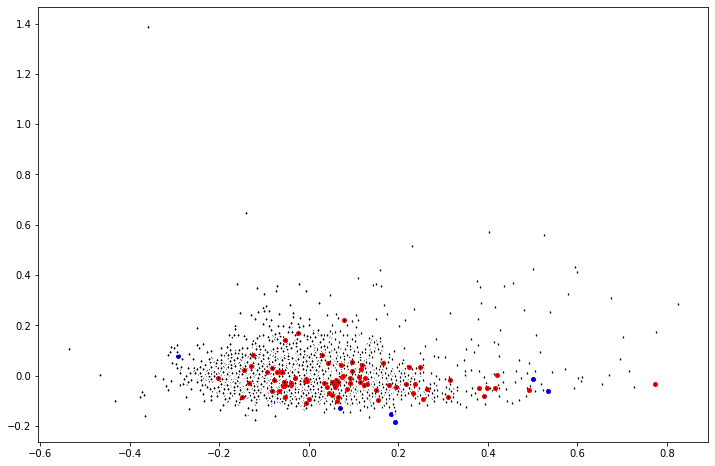

In [18]:
pca = PCA(n_components=2)
pca.fit(embeddings)
X_tf = pca.transform(embeddings)

#Abspeichern der Zwischenergebnisste im Datafram
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_

#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(15,8))
for d in df.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=4, color= d[1].labelcolor)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeans}'), color='black', markersize=1)


3729


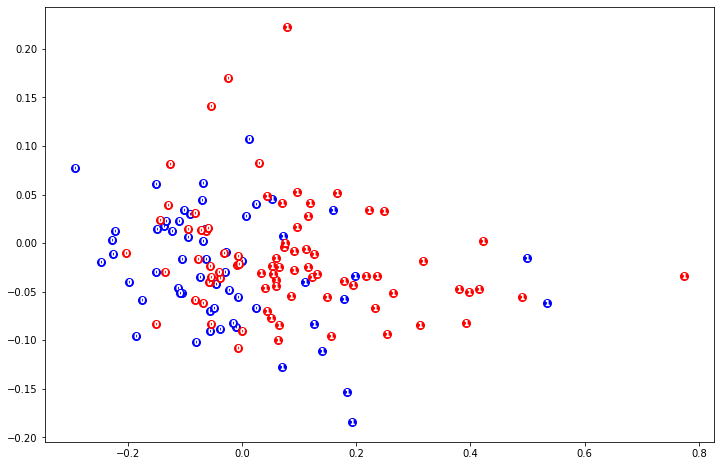

In [19]:
pca = PCA(n_components=2)
pca.fit(embeddings)
X_tf = pca.transform(embeddings)
print(len(X_tf))
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_

df_clean = df[df.labelcolor != 'white']
#df_embedding = df_clean['embedding']
#df_embedding.tolist()

plt.figure(figsize=(15,8))
for d in df_clean.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=8, color= d[1].labelcolor)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeans}'), color='white', markersize=6)


### Verteilung der Ergebnisse

In [20]:
b1 = df.loc[(df['kmeans'] == 1) & (df['labelcolor'] == 'blue')]
b0 = df.loc[(df['kmeans'] == 0) & (df['labelcolor'] == 'blue')]
r1 = df.loc[(df['kmeans'] == 1) & (df['labelcolor'] == 'red')]
r0 = df.loc[(df['kmeans'] == 0) & (df['labelcolor'] == 'red')]
print('b1: ', len(b1), 'b0: ', len(b0), 'r1: ', len(r1), 'r0: ', len(r0))

b1:  13 b0:  45 r1:  50 r0:  30


# Ohne Embeddings

(61309, 19)

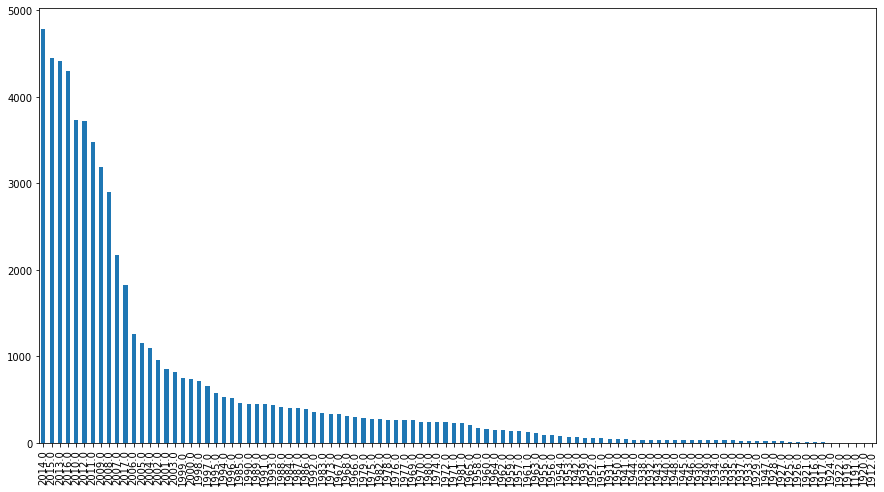

In [6]:
dfs.dropna(subset=['text', 'year'], inplace=True)
plt.figure(figsize=(15,8))
pd.value_counts(dfs['year']).plot.bar()
dfs.shape

## Split in Zeitperioden

red     4294
blue    3636
Name: colors, dtype: int64

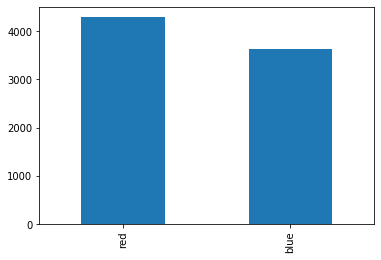

In [11]:
#Aufteilung in 1950 bis 1970 und 2016
colors = []
for x in dfs.year:
    if x == 2016:
        colors.append('red')
    elif (x <= 1970) & (x >= 1940):
        colors.append('blue')
    else: 
        colors.append('white')
dfs['colors']=colors
      
dfs_clean = dfs[dfs.colors != 'white']
pd.value_counts(dfs_clean.colors).plot.bar() 
pd.value_counts(dfs_clean.colors)

# K-Means

In [12]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
tokens = tfidf.fit_transform(dfs_clean.text)
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(df_split.text)

In [13]:
tokens.toarray(), tokens.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.00508504,
         0.        ],
        [0.        , 0.00065987, 0.00033067, ..., 0.        , 0.00041064,
         0.        ],
        [0.00503492, 0.00293209, 0.        , ..., 0.        , 0.00364927,
         0.        ],
        ...,
        [0.00443134, 0.00774178, 0.00258633, ..., 0.        , 0.0032118 ,
         0.        ],
        [0.0079613 , 0.        , 0.00929315, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00552032,
         0.        ]]), (7930, 10000))

In [14]:
models = KMeans(n_clusters=2)
models.fit(tokens)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
len(models.labels_)

7930

In [17]:
tokens

<7930x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 7862670 stored elements in Compressed Sparse Row format>

C:\Users\janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\janko\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

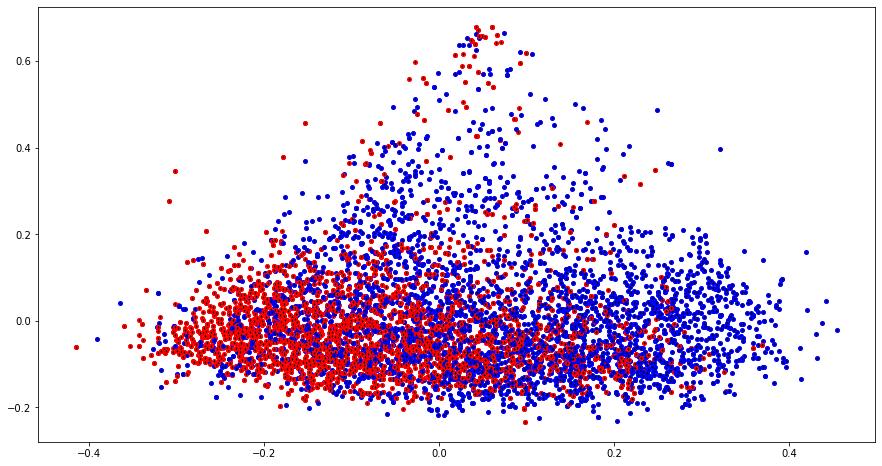

In [21]:
pca = PCA(n_components=2)
pca.fit(tokens.todense())
X_tf = pca.transform(tokens.todense())

#Abspeichern der Zwischenergebnisste im Datafram
dfs_clean['pcatokens_1'] = X_tf[:,0]
dfs_clean['pcatokens_2'] = X_tf[:,1]
dfs_clean['kmeanstokens'] = models.labels_

#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(15,8))
for d in dfs_clean.iterrows():
    x = d[1].pcatokens_1
    y = d[1].pcatokens_2    
    plt.plot(x, y, 'o', markersize=4, color= d[1].colors)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeanstokens}'), color='black', markersize=1)

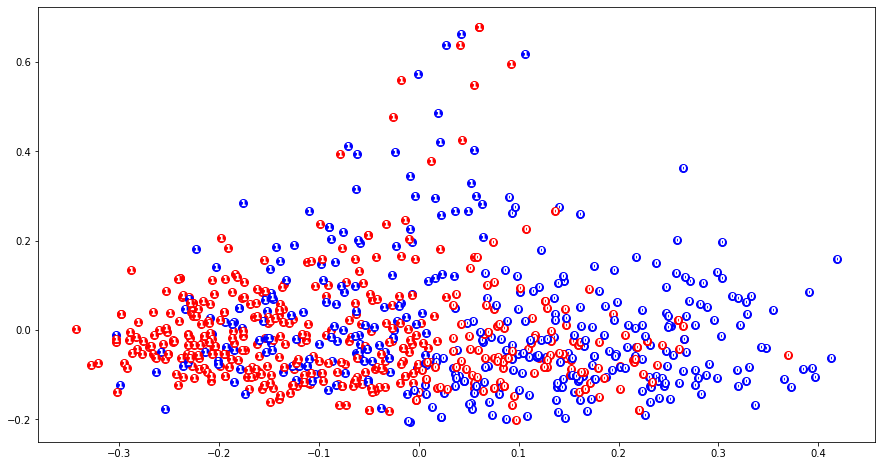

In [28]:
dfs_cleans = dfs_clean.sample(frac=0.1)

tfidf = TfidfVectorizer(max_features=10000)
tokens2 = tfidf.fit_transform(dfs_cleans.text)

pca = PCA(n_components=2)
pca.fit(tokens2.todense())
X_tf = pca.transform(tokens2.todense())

#Plotten anhand der gespeicherten Zwischenergebnisse 
plt.figure(figsize=(15,8))
for d in dfs_cleans.iterrows():
    x = d[1].pcatokens_1
    y = d[1].pcatokens_2    
    plt.plot(x, y, 'o', markersize=8, color= d[1].colors)
    plt.plot(x, y, marker=TextPath((-3, -3), f'{d[1].kmeanstokens}'), color='white', markersize=6)

## Ergebnisverteilung

In [26]:
b1 = dfs_cleans.loc[(dfs_cleans['kmeanstokens'] == 1) & (dfs_cleans['colors'] == 'blue')]
b0 = dfs_cleans.loc[(dfs_cleans['kmeanstokens'] == 0) & (dfs_cleans['colors'] == 'blue')]
r1 = dfs_cleans.loc[(dfs_cleans['kmeanstokens'] == 1) & (dfs_cleans['colors'] == 'red')]
r0 = dfs_cleans.loc[(dfs_cleans['kmeanstokens'] == 0) & (dfs_cleans['colors'] == 'red')]
print('b1: ', len(b1), 'b0: ', len(b0), 'r1: ', len(r1), 'r0: ', len(r0))

b1:  156 b0:  224 r1:  307 r0:  106
